# Classification of iris

### 1) Select features and categorie for practice

In [1]:
# import necessary modul
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
list(iris_dataset.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
# Check an iris dataset
iris_dataset

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [4]:
# mold the array of iris to dataframe
X = pd.DataFrame(np.array(iris_dataset.data)) 

In [5]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# rename the columns
columns_dic = {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}

X.rename(columns= columns_dic, inplace=True)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# mold the array to dataframe
Y = pd.DataFrame(np.array(iris_dataset.target)) 

# rename a column
Y = Y.rename(columns = {0:'Species'})

# check the dataset
Y['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [10]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# combine features and categorie
df_iris = X.join(Y)

# check
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
columns_need = ["sepal_length", "petal_length", "Species"]

# generate a dataframe for analyzing iris dataset
df_iris_vv = df_iris[df_iris.Species != 0] # virgicolor and virginica

#
df_train_test = df_iris_vv.loc[:, columns_need]
df_train_test.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


### 2) Analysis of the Data

In [13]:
# individual variable and non-dividual variable
X = df_train_test.iloc[:, :-1].values # by number/ values --> serries
y = df_train_test.loc[:, "Species"].values # by column's name

In [14]:
# for spliting train and test
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

70
30
70
30


### 3) Pretreatment / Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaler.mean_

array([6.20571429, 4.82857143])

In [18]:
scaler.transform(X_train)

array([[ 1.55233441,  1.50373026],
       [ 1.08395765,  0.08447923],
       [-1.88242851, -1.57131364],
       [-0.16504705, -0.97995904],
       [-0.94567499, -1.45304272],
       [-0.7895494 , -0.74341721],
       [-0.7895494 , -0.86168812],
       [-0.00892146, -0.62514629],
       [ 0.61558089, -0.50687537],
       [ 0.14720413,  0.08447923],
       [ 0.30332971, -0.62514629],
       [-1.10180057, -0.97995904],
       [ 0.14720413,  0.91237566],
       [-0.7895494 ,  0.20275015],
       [-0.00892146,  0.67583382],
       [ 0.14720413,  0.32102107],
       [-0.16504705,  0.08447923],
       [-0.47729822, -0.03379169],
       [ 0.77170647,  1.03064658],
       [ 2.33296235,  2.44989761],
       [-0.16504705, -0.27033353],
       [-0.16504705, -0.15206261],
       [-0.16504705,  0.91237566],
       [-0.63342381,  0.32102107],
       [ 0.30332971,  0.5575629 ],
       [ 2.33296235,  2.21335577],
       [ 1.08395765,  1.03064658],
       [ 0.4594553 ,  1.1489175 ],
       [-1.10180057,

In [19]:
scaler.transform(X_test)

array([[-0.32117264,  0.32102107],
       [-1.10180057, -1.3347718 ],
       [ 0.14720413,  0.91237566],
       [-0.94567499,  0.08447923],
       [-0.63342381, -0.86168812],
       [ 0.77170647,  1.03064658],
       [ 0.30332971,  0.91237566],
       [ 1.39620882,  1.26718842],
       [ 1.86458558,  1.50373026],
       [ 0.30332971,  0.91237566],
       [-0.94567499, -0.86168812],
       [-0.7895494 , -0.38860445],
       [ 0.14720413,  0.20275015],
       [ 0.14720413,  0.08447923],
       [ 0.77170647,  0.20275015],
       [ 0.77170647,  0.43929198],
       [-0.47729822, -0.74341721],
       [-0.00892146, -0.03379169],
       [ 0.92783206,  0.79410474],
       [-2.0385541 , -0.38860445],
       [-0.94567499, -0.74341721],
       [ 0.4594553 ,  0.43929198],
       [-0.00892146, -0.38860445],
       [ 0.61558089, -0.27033353],
       [ 0.77170647,  1.1489175 ],
       [ 2.33296235,  1.50373026],
       [ 2.64521352,  1.85854301],
       [ 2.17683676,  2.09508485],
       [-0.32117264,

### 4) Learning and Estimation

[three]

In [20]:
from sklearn.neighbors import KNeighborsClassifier
neigh_three = KNeighborsClassifier(n_neighbors=3)
neigh_three.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
y_pred_three = neigh_three.predict(X_test)

[five]

In [22]:
neigh_five = KNeighborsClassifier(n_neighbors=5)
neigh_five.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred_five = neigh_five.predict(X_test)

[one]

In [24]:
neigh_one = KNeighborsClassifier(n_neighbors=1)
neigh_one.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
y_pred_one = neigh_one.predict(X_test)

### 5) Evaluation

[accuracy] 
$
(TP + TN)/(TP + TN + FP + FN)
$

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, y_pred_three)

0.8333333333333334

In [28]:
accuracy_score(y_test, y_pred_five)

0.8333333333333334

In [29]:
accuracy_score(y_test, y_pred_one)

0.8333333333333334

[recall] 
$
(TP)/(TP + FN)
$

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_three, average='macro')

0.8333333333333334

In [31]:
recall_score(y_test, y_pred_five, average='macro')

0.8333333333333334

In [32]:
recall_score(y_test, y_pred_one, average='macro')

0.8333333333333334

[precision] 
$
(TP)/(TP + FP)
$

In [33]:
from sklearn.metrics import precision_score

In [34]:
precision_score(y_test, y_pred_three, average='macro')

0.8257918552036199

In [35]:
precision_score(y_test, y_pred_five, average='macro')

0.8257918552036199

In [36]:
precision_score(y_test, y_pred_one, average='macro')

0.8257918552036199

[F measure] 
$
(2*precision*recall)/(precision + recall)
$

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_three, average='macro')  

0.8285714285714285

In [38]:
f1_score(y_test, y_pred_five, average='macro')  

0.8285714285714285

In [39]:
f1_score(y_test, y_pred_one, average='macro')  

0.8285714285714285

[Mixing matrix]
##### TP: True Positive
##### FN: False Negative
##### FP: False Positive
##### TN: True Negative

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_three)

array([[10,  2],
       [ 3, 15]], dtype=int64)

In [41]:
confusion_matrix(y_test, y_pred_five)

array([[10,  2],
       [ 3, 15]], dtype=int64)

In [42]:
confusion_matrix(y_test, y_pred_one)

array([[10,  2],
       [ 3, 15]], dtype=int64)

### 6) Visualization

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        ****学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

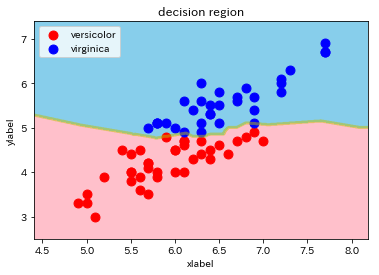

In [44]:
decision_region(X_train, y_train, neigh_three)

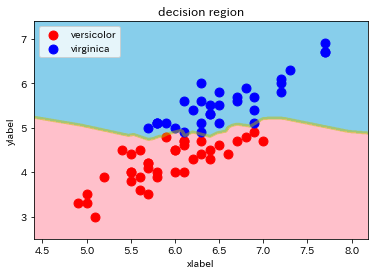

In [45]:
decision_region(X_train, y_train, neigh_five)

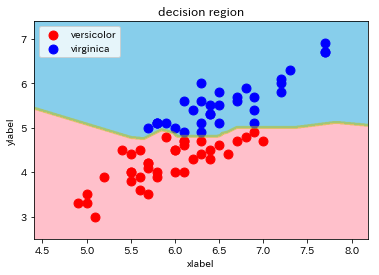

In [46]:
decision_region(X_train, y_train, neigh_one)

### 7) Learning other methods

[KNeighborsClassifier]
###### Executed above

[LogisticRegression]

In [50]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)

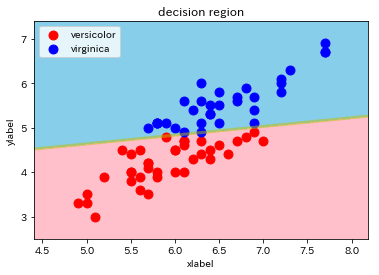

In [51]:
decision_region(X_train, y_train, clf)

[SVC]

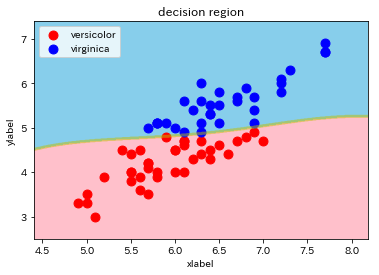

In [52]:
import numpy as np
from sklearn.svm import SVC
clf = SVC(gamma='auto')
SVC_model = clf.fit(X, y)

decision_region(X_train, y_train, SVC_model)

[DecisionTreeClassifier]

In [53]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

# graph.render("sample")

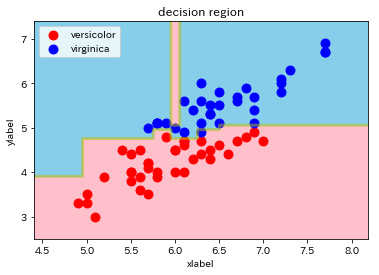

In [55]:
decision_region(X_train, y_train, clf)

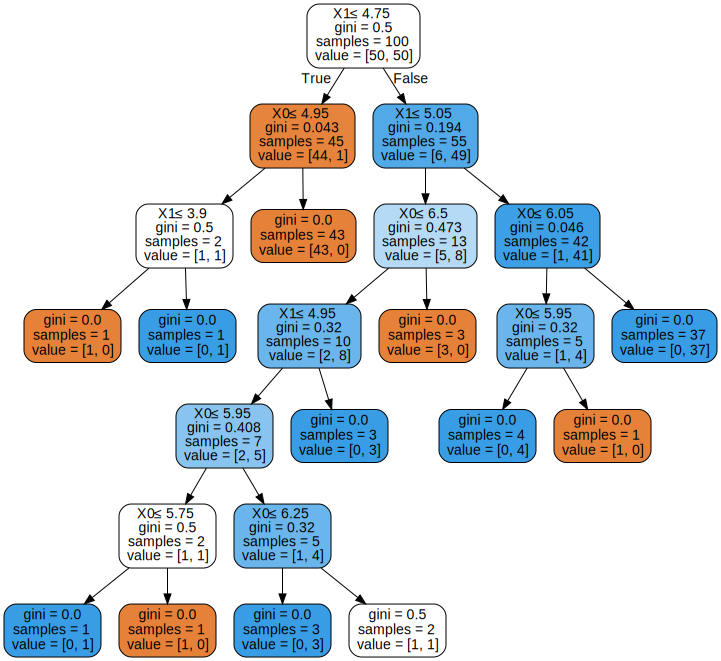

In [54]:
dot_data = tree.export_graphviz(clf, out_file=None,   
                     filled=True, rounded=True,  
                     special_characters=True)   # feature_names=iris.feature_names, class_names=iris.target_names, 
graph = graphviz.Source(dot_data)  
graph 

[Random Forest]

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


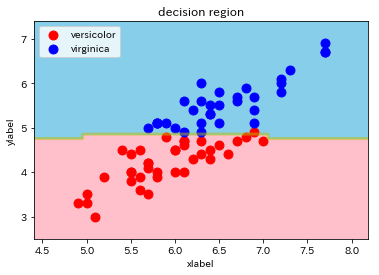

In [58]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
RF_model = clf.fit(X, y)

decision_region(X_train, y_train, RF_model)

### 8) Advance task/ Meaning of each parameter

### 9) Advance task/ Comparison of standardization 

### 10) Advance task/ Objective variables, a method with high accuracy 